In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns
import random

In [2]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, _ = make_blobs(n_samples=100, n_features=2, centers=5, cluster_std=0.5, shuffle=True, random_state=0)

X_train, X_val, _ , _ = train_test_split(X_train, _ , train_size=0.7)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)

In [3]:
#[Problem 1] Determine the initial value of the center point
def initial_centroied(X, K):
      n = len(X[0]) # Number of features
      centroids=np.array([]).reshape(n,0)

      for i in range(K):
          centroids=np.c_[centroids,X[random.randint(0,n-1)]]

      return centroids

In [4]:
K = 3 # Select 3 clusters
centroids = initial_centroied(X_train, K)
print("Initial centroids: \n{}".format(centroids))

Initial centroids: 
[[-0.58054978 -0.1067433  -0.1067433 ]
 [ 0.62647831 -0.55344062 -0.55344062]]


In [6]:
#[Problem 3] Allocation to cluster
def euclidean(X, Y):
      return np.sum((X - Y)**2, axis=1)

In [7]:
x_temp = np.array([[0,1],[1,4]])
y_temp = np.array([[2,4],[-1,3]])
print("Distance: {}".format(euclidean(x_temp, y_temp)))

# Test with our first 20 rows of original data and centroids at cluster 1
distance_array = euclidean(X_train[0:20], centroids[:,0])
print("Distance: \n{}".format(distance_array))
print("Shape: {}".format(distance_array.shape))

Distance: [13  5]
Distance: 
[ 1.61670128  0.         10.4574647   9.73149128  0.26843829  2.14954434
  0.19150872  0.11326055  1.60850615 11.13659327  0.1654853   0.02957148
  0.27903781  0.20572832  0.17327678  8.45532249  1.47573257  1.8271443
  0.22861685  0.04711042]
Shape: (20,)


In [8]:
def euclidean_all(X, centroids):
      euclidean_all = np.array([]).reshape(len(X),0)

      for i in range(len(centroids[0])): # Iterate each cluster
          distance = euclidean(X, centroids[:,i])
          euclidean_all = np.c_[euclidean_all, distance]

      return euclidean_all

In [9]:
# Test with our original data and centroids
distance_array = euclidean_all(X_train, centroids)
print("Distance: \n{}".format(distance_array))
print("Shape: {}".format(distance_array.shape))

Distance: 
[[1.61670128e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.61670128e+00 1.61670128e+00]
 [1.04574647e+01 4.61666709e+00 4.61666709e+00]
 [9.73149128e+00 4.48519193e+00 4.48519193e+00]
 [2.68438295e-01 1.68978364e+00 1.68978364e+00]
 [2.14954434e+00 7.07708674e-02 7.07708674e-02]
 [1.91508716e-01 7.01701149e-01 7.01701149e-01]
 [1.13260553e-01 1.31801637e+00 1.31801637e+00]
 [1.60850615e+00 4.97432749e-02 4.97432749e-02]
 [1.11365933e+01 5.06789969e+00 5.06789969e+00]
 [1.65485300e-01 1.30764226e+00 1.30764226e+00]
 [2.95714794e-02 1.23661444e+00 1.23661444e+00]
 [2.79037809e-01 1.12127591e+00 1.12127591e+00]
 [2.05728324e-01 1.23735002e+00 1.23735002e+00]
 [1.73276784e-01 1.21839520e+00 1.21839520e+00]
 [8.45532249e+00 3.63476203e+00 3.63476203e+00]
 [1.47573257e+00 1.34356575e-02 1.34356575e-02]
 [1.82714430e+00 2.49160442e-02 2.49160442e-02]
 [2.28616852e-01 1.41680577e+00 1.41680577e+00]
 [4.71104201e-02 2.01378410e+00 2.01378410e+00]
 [2.44224806e-01 1.02459224e+

In [10]:
C = np.argmin(distance_array,axis=1)+1
C

array([2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 1], dtype=int64)

In [11]:
def cluster_allocation(X, distance_array):
      cluster_data = {}
      c_min_idx = np.argmin(distance_array,axis=1) + 1 # The array containing the cluster index with the minimum distance from the point to that cluster

      for k in range(distance_array.shape[1]): # Create the keys represent for each cluster
          cluster_data[k+1] = np.array([]).reshape(len(X[0]), 0) # Array with shape of n_features
          
      for i in range(len(X)):
          c_idx = c_min_idx[i] # Get the cluster index of each value that have been found
          cluster_data[c_idx] = np.c_[cluster_data[c_idx], X[i]] # Append the value at ith-row of dataset X to the corresponding key in dictionary
      
      for k in range(len(cluster_data)):
          cluster_data[k+1] = cluster_data[k+1].T

      return cluster_data

In [12]:
clustered_data = cluster_allocation(X_train, distance_array)

print("Cluster 1 data: \n{}\n".format(clustered_data[1]))
print("Cluster 2 data: \n{}\n".format(clustered_data[2]))
print("Cluster 3 data: \n{}\n".format(clustered_data[3]))

Cluster 1 data: 
[[-0.58054978  0.62647831]
 [-0.07644319  0.74612297]
 [-0.37509511  0.24008849]
 [-0.24644156  0.58607715]
 [-0.84645083  0.31861157]
 [-0.4646836   0.4994094 ]
 [-0.86758923  0.18303027]
 [-0.85755059  0.26731418]
 [-0.17166149  0.54845811]
 [-0.93299218  0.30336656]
 [-0.4760806   0.81673238]
 [-0.80029933  0.18383292]
 [-0.93428053  0.01444122]
 [-0.90948101  1.64568505]
 [-0.76637481  0.10133513]
 [-0.67548238  1.40819972]
 [-0.64599312  0.34121766]
 [-0.39493074  0.32233791]
 [-0.79392358  1.65973344]
 [-0.82290766  1.81788942]
 [-0.31334795  0.48627327]
 [-1.04000159  0.26625194]
 [-0.89768783  1.57126193]
 [-0.08121806  0.50052146]
 [-0.807482    0.25933058]
 [-0.65090262 -0.07360544]
 [-1.02798901  0.40914151]
 [-0.42013039  0.64464659]
 [-0.97684601  1.4988927 ]
 [-0.66790754  1.61307933]
 [-0.24778689  0.74391042]
 [-0.93789559  1.34002167]
 [-0.22693251  0.40534176]
 [-0.89293931  1.66580585]
 [-0.7656282   1.40627394]
 [-0.98950673  0.40421981]
 [-0.927112

In [13]:
#[Problem 4] Movement of the center point
def centroid_fix(clustered_data, centroids):
      new_centroids = centroids

      for k in range(len(new_centroids[0])): # Iterate each cluster to assign the new value
          new_centroids[:,k] = np.mean(clustered_data[k+1], axis=0) # Calculate the mean of each cluster corresponding to cluster index

      return new_centroids

In [14]:
new_centroids = centroid_fix(clustered_data, centroids)
print("Old centroids value: \n{}".format(centroids))
print("New centroids value: \n{}".format(new_centroids))

Old centroids value: 
[[-0.67656019  0.85115637         nan]
 [ 0.74486304 -0.93708576         nan]]
New centroids value: 
[[-0.67656019  0.85115637         nan]
 [ 0.74486304 -0.93708576         nan]]


C:\Users\o.oyuntuya\AppData\Local\anaconda3\envs\OnlineTraining\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\o.oyuntuya\AppData\Local\anaconda3\envs\OnlineTraining\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [15]:
#[Problem 2] Creation of a function to obtain SSE
def SSE(distance_array):
      sse = 0
      
      for k in range(len(distance_array[0])):
          temp_dist = distance_array[:,k]**2
          sse += np.sum(temp_dist, axis=0)

      return sse

In [16]:
#[Problem 5] Repeat
iter = 5
K = 3 # Select 3 clusters
centroids = initial_centroied(X_train, K)
print("Old centroids value: \n{}\n".format(centroids))

# Repeat clustering
for i in range(iter):
    # Get all distance from each point to centroid
    distance_array = euclidean_all(X_train, centroids)
    # Calculate the sum squared error
    sse = SSE(distance_array)
    # Allocate data to every clusters
    clustered_data = cluster_allocation(X_train, distance_array)
    # Update centroid in each cluster
    new_centroids = centroid_fix(clustered_data, centroids)
    print("Iteration {}\n Sum squared error: {}\nNew centroids value: \n{}\n\n".format(i+1, sse, new_centroids))

Old centroids value: 
[[-0.58054978 -0.1067433  -0.58054978]
 [ 0.62647831 -0.55344062  0.62647831]]

Iteration 1
 Sum squared error: 3750.633434211741
New centroids value: 
[[-0.67656019  0.85115637         nan]
 [ 0.74486304 -0.93708576         nan]]


Iteration 2
 Sum squared error: nan
New centroids value: 
[[            nan             nan -6.18552828e-17]
 [            nan             nan  1.36398829e-16]]


Iteration 3
 Sum squared error: nan
New centroids value: 
[[-6.18552828e-17             nan             nan]
 [ 1.36398829e-16             nan             nan]]


Iteration 4
 Sum squared error: nan
New centroids value: 
[[            nan -6.18552828e-17             nan]
 [            nan  1.36398829e-16             nan]]


Iteration 5
 Sum squared error: nan
New centroids value: 
[[-6.18552828e-17             nan             nan]
 [ 1.36398829e-16             nan             nan]]




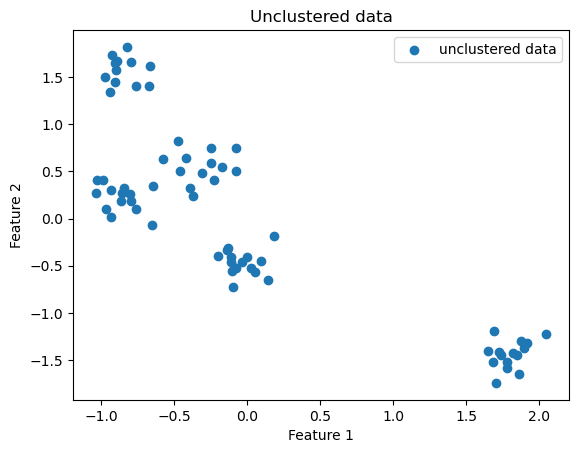

In [17]:
# Unclustered data
plt.scatter(X_train[:,0], X_train[:,1], label="unclustered data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Unclustered data')
plt.show()

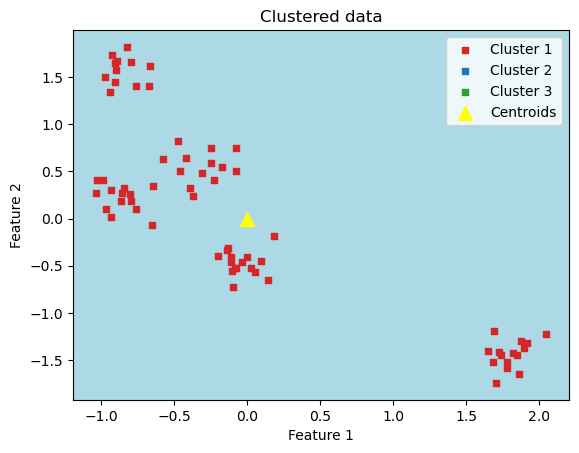

In [18]:
color = ['tab:red', 'tab:blue', 'tab:green']
cluster = ['Cluster 1', 'Cluster 2', 'Cluster 3']

ax = plt.axes()
ax.set_facecolor("lightblue")

for k in range(len(cluster)):
    plt.scatter(clustered_data[k+1][:,0],
                clustered_data[k+1][:,1],
                marker="s",
                linewidths=1,
                s=25, 
                c=color[k], 
                label=cluster[k])

plt.scatter(new_centroids[0,:],
            new_centroids[1,:],
            marker="^",
            linewidths=1,
            s=100,
            c='yellow',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Clustered data')
plt.show()

In [20]:
#[Problem 6] - [Problem 7]

from numpy import linalg as LA

class ScratchKMeans():
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose


    def fit(self, X):
        self.cluster_output = {}
        self.cluster_centroid = np.array([]).reshape(X.shape[1], 0)
        self.best_sse = 10e7

        self.poor_division = False

        for init in range(self.n_init):
            centroids = self.initial_centroid(X, self.n_clusters)
            print("\nInitial {}\n".format(init))
            for i in range(self.max_iter):
                # Get all distance from each point to centroid
                prev_centroids = centroids

                distance_array = self.euclidean_all(X, centroids)

                # Calculate the sum squared error
                sse = self.SSE()

                # Allocate data to every clusters
                clustered_data = self.cluster_allocation(X, distance_array)
                
                # Check if there is less cluster compared to the input K
                for key in clustered_data.keys():
                    if len(clustered_data[key]) == 0:
                      print("\nCluster division performed poorly! Skip this clustering . . .")
                      self.poor_division = True

                if self.poor_division == True:
                    break

                # Update centroid in each cluster
                centroids = self.centroid_fix(clustered_data, centroids)

                #if sse < self.best_sse:
                self.best_sse = sse
                self.cluster_output = clustered_data
                self.cluster_centroid = centroids

                if self.verbose == True:
                    if (i % 100 == 0 and i > 0):
                        print("Iteration {}".format(i))

                #if (LA.norm(centroids - prev_centroids) <= self.tol):
                #    print("\nCentroids has reach their convergence! Stop learning . . .")
                #    break


    def predict(self, X):
        distance_array = self.euclidean_all(X, self.cluster_centroid)
        clustered_data = self.cluster_allocation(X, distance_array)

        return clustered_data, self.cluster_centroid


    def initial_centroid(self, X, K):
      n = len(X[0]) # Number of features
      centroids=np.array([]).reshape(n,0)

      for i in range(K):
          centroids=np.c_[centroids,X[random.randint(0,len(X)-1)]]

      return centroids


    def euclidean(self, X, Y):
      return np.sum((X - Y)**2, axis=1)

    
    def euclidean_all(self, X, centroids):
      euclidean_all = np.array([]).reshape(len(X),0)

      for i in range(len(centroids[0])): # Iterate each cluster
          distance = self.euclidean(X, centroids[:,i])
          euclidean_all = np.c_[euclidean_all, distance]

      return euclidean_all

    
    def cluster_allocation(self, X, distance_array):
      cluster_data = {}
      c_min_idx = np.argmin(distance_array,axis=1) + 1 # The array containing the cluster index with the minimum distance from the point to that cluster

      for k in range(distance_array.shape[1]): # Create the keys represent for each cluster
          cluster_data[k+1] = np.array([]).reshape(len(X[0]), 0) # Array with shape of n_features
          
      for i in range(len(X)):
          c_idx = c_min_idx[i] # Get the cluster index of each value that have been found
          cluster_data[c_idx] = np.c_[cluster_data[c_idx], X[i]] # Append the value at ith-row of dataset X to the corresponding key in dictionary
      
      for k in range(len(cluster_data)):
          cluster_data[k+1] = cluster_data[k+1].T

      return cluster_data

    
    def centroid_fix(self, clustered_data, centroids):
      new_centroids = centroids

      for k in range(len(new_centroids[0])): # Iterate each cluster to assign the new value
          new_centroids[:,k] = np.mean(clustered_data[k+1], axis=0) # Calculate the mean of each cluster corresponding to cluster index

      return new_centroids


    def SSE(self):
      sse = 0
      
      for k in range(len(distance_array[0])):
          temp_dist = distance_array[:,k]**2
          sse += np.sum(temp_dist, axis=0)

      return sse


    def WSSE(self):
      wsse = 0
      
      for k in range(self.n_clusters):
            wsse+=np.sum((self.cluster_output[k+1]-self.cluster_centroid[:,k])**2)
  
      return wsse

In [21]:
K = 3
iter = 1000
n_init = 10
tol = 1e-4
scratch_cluster_model = ScratchKMeans(n_clusters = K,
                                      n_init = n_init,
                                      max_iter = iter,
                                      tol = tol,
                                      verbose=True)
scratch_cluster_model.fit(X_train)


Initial 0

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900

Initial 1

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900

Initial 2

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900

Initial 3

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900

Initial 4


Cluster division performed poorly! Skip this clustering . . .

Initial 5


Initial 6


Initial 7


Initial 8


Initial 9



In [22]:
best_sse = scratch_cluster_model.best_sse
best_centroid = scratch_cluster_model.cluster_centroid
print("The minimum SSE: {}".format(best_sse))
print("Final centroids: \n{}".format(best_centroid))

The minimum SSE: nan
Final centroids: 
[[-0.391283    1.79995717 -0.84784905]
 [ 0.06402129 -1.43703762  1.5668874 ]]


In [23]:
output = scratch_cluster_model.cluster_output

print("Cluster 1 data: \n{}\n".format(output[1]))
print("Cluster 2 data: \n{}\n".format(output[2]))
print("Cluster 3 data: \n{}\n".format(output[3]))

Cluster 1 data: 
[[-0.1067433  -0.55344062]
 [-0.58054978  0.62647831]
 [-0.07644319  0.74612297]
 [ 0.14127707 -0.64965269]
 [-0.37509511  0.24008849]
 [-0.24644156  0.58607715]
 [ 0.09065257 -0.44962278]
 [-0.84645083  0.31861157]
 [-0.4646836   0.4994094 ]
 [-0.86758923  0.18303027]
 [-0.85755059  0.26731418]
 [-0.17166149  0.54845811]
 [-0.0377431  -0.46030293]
 [ 0.05033793 -0.56898185]
 [-0.93299218  0.30336656]
 [-0.4760806   0.81673238]
 [-0.80029933  0.18383292]
 [-0.93428053  0.01444122]
 [-0.11124686 -0.46092187]
 [ 0.18431875 -0.19047052]
 [-0.76637481  0.10133513]
 [-0.09963028 -0.72173468]
 [-0.64599312  0.34121766]
 [-0.39493074  0.32233791]
 [-0.14306085 -0.33641643]
 [-0.00278056 -0.40571725]
 [-0.07756675 -0.52174398]
 [-0.31334795  0.48627327]
 [-1.04000159  0.26625194]
 [-0.08121806  0.50052146]
 [-0.20043904 -0.40066441]
 [-0.807482    0.25933058]
 [-0.65090262 -0.07360544]
 [-1.02798901  0.40914151]
 [-0.42013039  0.64464659]
 [ 0.02258762 -0.52746994]
 [-0.247786

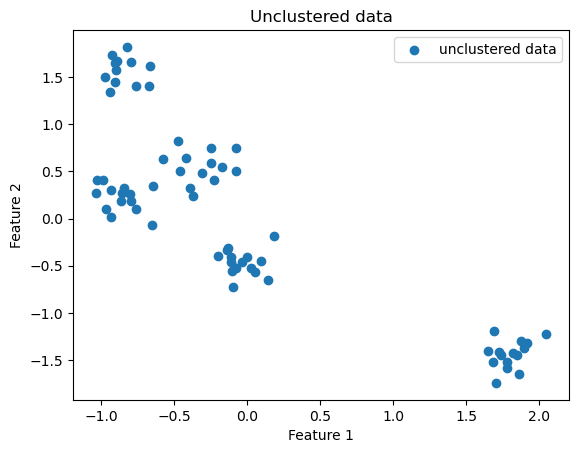

In [24]:
# Unclustered data
plt.scatter(X_train[:,0], X_train[:,1], label="unclustered data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Unclustered data')
plt.show()

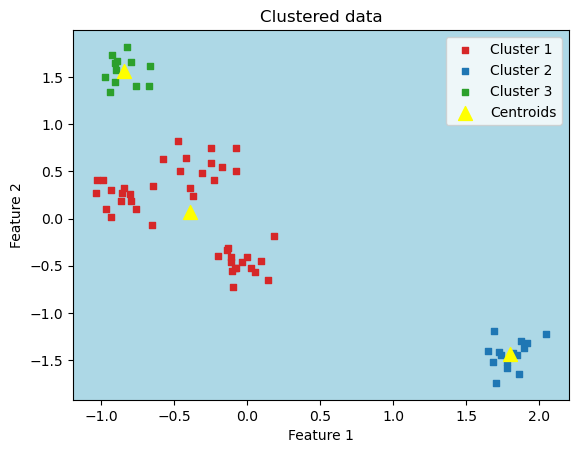

In [25]:
color = ['tab:red', 'tab:blue', 'tab:green']
cluster = ['Cluster 1', 'Cluster 2', 'Cluster 3']

ax = plt.axes()
ax.set_facecolor("lightblue")

for k in range(len(cluster)):
    plt.scatter(output[k+1][:,0],
                output[k+1][:,1],
                marker="s",
                linewidths=1,
                s=25, 
                c=color[k], 
                label=cluster[k])

plt.scatter(best_centroid[0,:],
            best_centroid[1,:],
            marker="^",
            linewidths=1,
            s=100,
            c='yellow',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Clustered data')
plt.show()

In [26]:
y_pred, estimate_centroids = scratch_cluster_model.predict(X_val)

print("Cluster 1 data: \n{}\n".format(y_pred[1]))
print("Cluster 2 data: \n{}\n".format(y_pred[2]))
print("Cluster 3 data: \n{}\n".format(y_pred[3]))

Cluster 1 data: 
[[ 0.1650298   0.03972116]
 [-0.85122823 -0.03144506]
 [-0.76712008 -0.04469516]
 [ 0.30876683 -0.72554849]
 [-0.56354904 -0.01713019]
 [-0.13456221  0.21483306]
 [ 0.21270363 -0.91297823]
 [-0.18759314  0.26230587]
 [-0.76441794 -0.29426276]
 [-0.02427906  0.13814019]
 [-0.20938096  0.1801625 ]
 [ 0.02500478  0.40685691]
 [ 0.08116479 -0.86383627]
 [-0.08093397  0.28681046]
 [ 0.15893523 -0.65888607]
 [-0.81371135  0.10445297]
 [-0.87374484  0.11321328]]

Cluster 2 data: 
[[ 2.1808601  -1.81651702]
 [ 1.95530702 -1.49888024]
 [ 2.21005139 -1.68303506]
 [ 1.92046942 -1.55616604]
 [ 2.04694259 -1.78307437]]

Cluster 3 data: 
[[-0.75331545  1.12509783]
 [-0.89462722  1.15628155]
 [-0.94093864  1.27750346]
 [-0.90513005  1.33346646]
 [-0.66238112  1.1879991 ]
 [-0.80714241  1.48342601]
 [-0.41902228  1.34730156]
 [-0.61215761  1.22888262]]



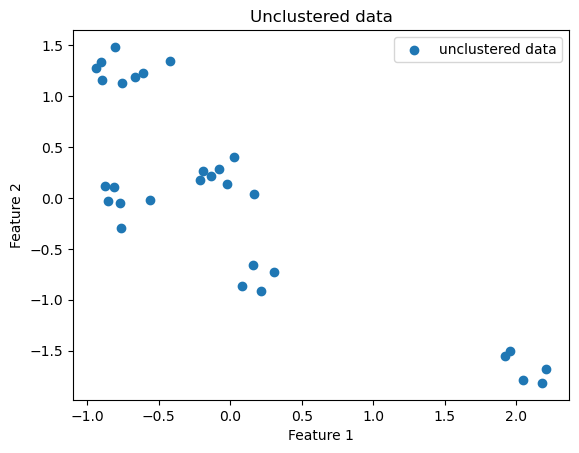

In [27]:
# Unclustered data
plt.scatter(X_val[:,0], X_val[:,1], label="unclustered data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Unclustered data')
plt.show()

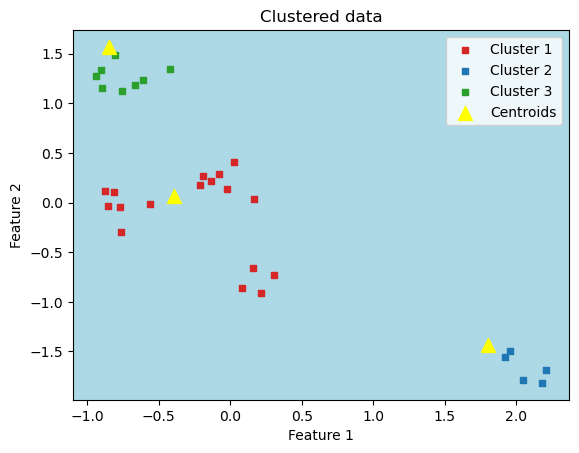

In [28]:
color = ['tab:red', 'tab:blue', 'tab:green']
cluster = ['Cluster 1', 'Cluster 2', 'Cluster 3']

ax = plt.axes()
ax.set_facecolor("lightblue")

for k in range(len(cluster)):
    plt.scatter(y_pred[k+1][:,0],
                y_pred[k+1][:,1],
                marker="s",
                linewidths=1,
                s=25, 
                c=color[k], 
                label=cluster[k])

plt.scatter(estimate_centroids[0,:],
            estimate_centroids[1,:],
            marker="^",
            linewidths=1,
            s=100,
            c='yellow',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Clustered data')
plt.show()

In [29]:
#[Problem 8] Implementation of elbow method

def elbow(X, K_min, K_max):
    """
    A function that select the best K value (number of clusters)

    """
    iter = 100
    n_init = 5
    tol = 1e-4

    sse_array=np.array([])

    for K in range (K_min, K_max):
        print("---------------\nNumber of clusters: {}".format(K))
        scratch_cluster_model = ScratchKMeans(n_clusters = K,
                                      n_init = n_init,
                                      max_iter = iter,
                                      tol = tol,
                                      verbose=True)
        scratch_cluster_model.fit(X)
        output, centroids = scratch_cluster_model.cluster_output, scratch_cluster_model.cluster_centroid.T
        sse=0
        for k in range(K):
            sse+=np.sum((output[k+1]-centroids[k,:])**2)

        sse_array=np.append(sse_array,sse)

    return sse_array

In [30]:
#[Problem 8] Implementation of elbow method
X_train, _ = make_blobs(n_samples=200, centers=5, random_state=42)

K_min = 1
K_max = 6

sse_list = elbow(X_train, K_min, K_max)

---------------
Number of clusters: 1

Initial 0


Initial 1


Initial 2


Initial 3


Initial 4

---------------
Number of clusters: 2

Initial 0


Initial 1


Initial 2


Initial 3


Initial 4

---------------
Number of clusters: 3

Initial 0


Initial 1


Initial 2


Initial 3


Initial 4

---------------
Number of clusters: 4

Initial 0


Initial 1


Initial 2


Initial 3


Initial 4

---------------
Number of clusters: 5

Initial 0


Initial 1


Initial 2


Initial 3


Initial 4



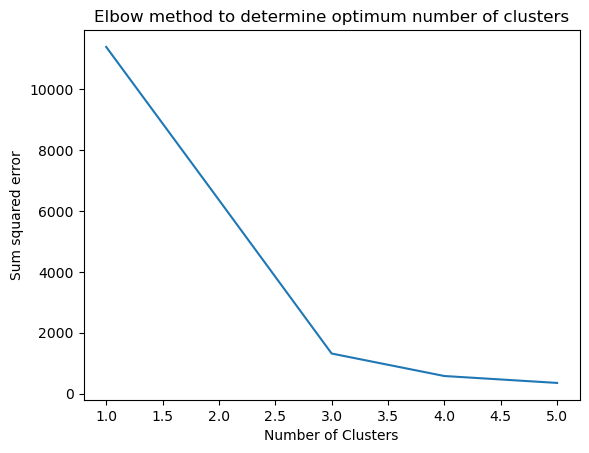

In [31]:
K_array=np.arange(1,6,1)
plt.plot(K_array,sse_list)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum squared error')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

In [33]:
df_train = pd.read_csv('import/wholesale.csv')
print("Train dataset -- Rows: {}, Columns: {}".format(df_train.shape[0], df_train.shape[1]))

Train dataset -- Rows: 440, Columns: 8


In [34]:
df_train.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(df_train)
df_pca = pca.transform(df_train)

print("Train dataset -- Rows: {}, Columns: {}".format(df_pca.shape[0], df_pca.shape[1]))
df_pd = pd.DataFrame(data=df_pca)
df_pd.head(10)

Train dataset -- Rows: 440, Columns: 2


,0,1
0,650.022120,1585.519107
1,-4426.804984,4042.451521
2,-4841.998710,2578.762188
3,990.346444,-6279.806002
4,10657.998731,-2159.725789
5,-2765.961593,-959.870712
6,-715.550892,-2013.002249
7,-4474.583669,1429.496985
8,-6712.095393,-2205.909168
9,-4823.634365,13480.559214


In [36]:
#[Problem 11] Comparison with known groups

K = 5
iter = 100
n_init = 10
tol = 1e-4
scratch_cluster_model = ScratchKMeans(n_clusters = K,
                                      n_init = n_init,
                                      max_iter = iter,
                                      tol = tol,
                                      verbose=True)
scratch_cluster_model.fit(df_pca)


Initial 0


Initial 1


Initial 2


Initial 3


Initial 4


Initial 5


Initial 6


Initial 7


Initial 8


Initial 9



In [37]:
best_sse = scratch_cluster_model.best_sse
best_centroid = scratch_cluster_model.cluster_centroid
print("The minimum SSE: {}".format(best_sse))
print("Final centroids: \n{}".format(best_centroid))

The minimum SSE: nan
Final centroids: 
[[-6399.71175178 37704.64158496  9052.39957539 14537.71769494
  -5607.91711162]
 [-4169.29691651 -5488.35403111 -4808.55908479 61715.67086327
  14199.18040566]]


In [38]:
output = scratch_cluster_model.cluster_output

print("Cluster 1 data: \n{}\n".format(output[1]))
print("Cluster 2 data: \n{}\n".format(output[2]))
print("Cluster 3 data: \n{}\n".format(output[3]))
print("Cluster 4 data: \n{}\n".format(output[4]))
print("Cluster 5 data: \n{}\n".format(output[5]))


Cluster 1 data: 
[[ 6.50022120e+02  1.58551911e+03]
 [-4.42680498e+03  4.04245152e+03]
 [-4.84199871e+03  2.57876219e+03]
 [ 9.90346444e+02 -6.27980600e+03]
 [-2.76596159e+03 -9.59870712e+02]
 [-7.15550892e+02 -2.01300225e+03]
 [-4.47458367e+03  1.42949698e+03]
 [-6.71209539e+03 -2.20590917e+03]
 [ 3.63937822e+01 -6.03789639e+03]
 [-2.99772589e+03 -6.09387931e+03]
 [-6.36709517e+03 -3.68071268e+03]
 [-4.86153157e+03 -2.25592277e+02]
 [-7.24486683e+03 -7.34772327e+03]
 [-2.96863905e+03 -7.15886854e+03]
 [ 8.72160239e+02 -7.60388820e+03]
 [-9.81327672e+03 -4.16283155e+03]
 [-1.15280156e+04 -6.04897826e+03]
 [-1.13155164e+04  3.97022693e+03]
 [-2.46870964e+03  3.41766824e+03]
 [-6.45598362e+02  3.32887016e+03]
 [-6.35452089e+03 -7.16528452e+03]
 [-9.22606332e+03 -1.18110996e+03]
 [-7.34350011e+03 -2.89573987e+03]
 [ 4.52703315e+02 -7.97548637e+03]
 [-6.21764093e+03  6.24920470e+02]
 [-4.22019178e+03 -6.91381739e+02]
 [-3.99325128e+03  9.21025346e-01]
 [-7.82844704e+03 -5.78164161e+03]
 [-

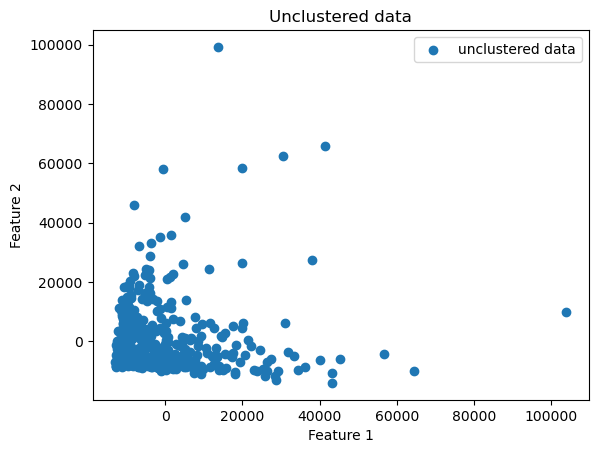

In [39]:
# Unclustered data
plt.scatter(df_pca[:,0], df_pca[:,1], label="unclustered data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Unclustered data')
plt.show()

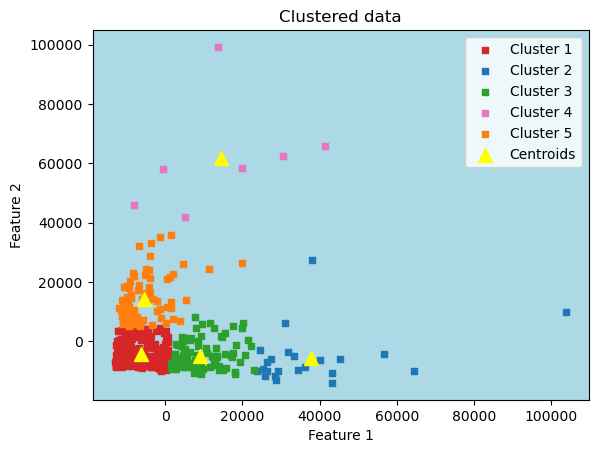

In [40]:
color = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink', 'tab:orange']
cluster = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

ax = plt.axes()
ax.set_facecolor("lightblue")

for k in range(len(cluster)):
    plt.scatter(output[k+1][:,0],
                output[k+1][:,1],
                marker="s",
                linewidths=1,
                s=25, 
                c=color[k], 
                label=cluster[k])

plt.scatter(best_centroid[0,:],
            best_centroid[1,:],
            marker="^",
            linewidths=1,
            s=100,
            c='yellow',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Clustered data')
plt.show()

In [41]:
#[Problem 11] Comparison with known groups

print("All region types: {}".format(df_train['Region'].unique()))
print("All channel types: {}".format(df_train['Channel'].unique()))

All region types: [3 1 2]
All channel types: [2 1]


In [42]:
df_train.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


<Axes: xlabel='Fresh', ylabel='Grocery'>

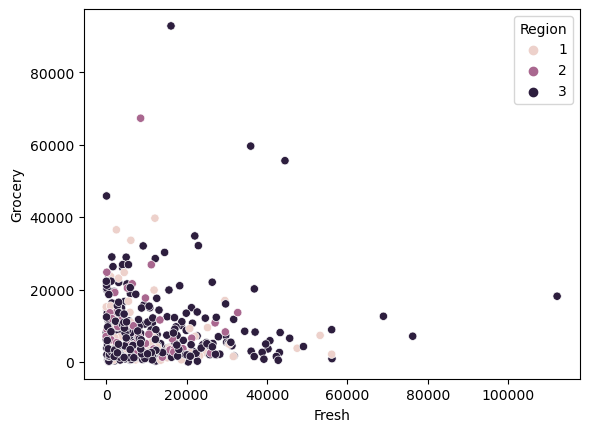

In [43]:
sns.scatterplot(data=df_train, x="Fresh", y="Grocery", hue="Region")

<Axes: xlabel='Fresh', ylabel='Grocery'>

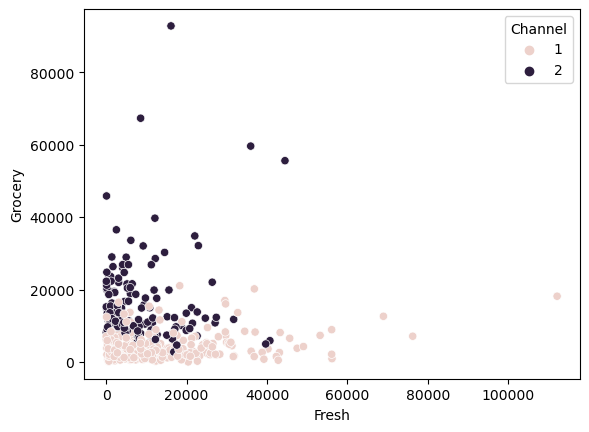

In [44]:
sns.scatterplot(data=df_train, x="Fresh", y="Grocery", hue="Channel")

Text(0.5, 1.0, 'Region 3')

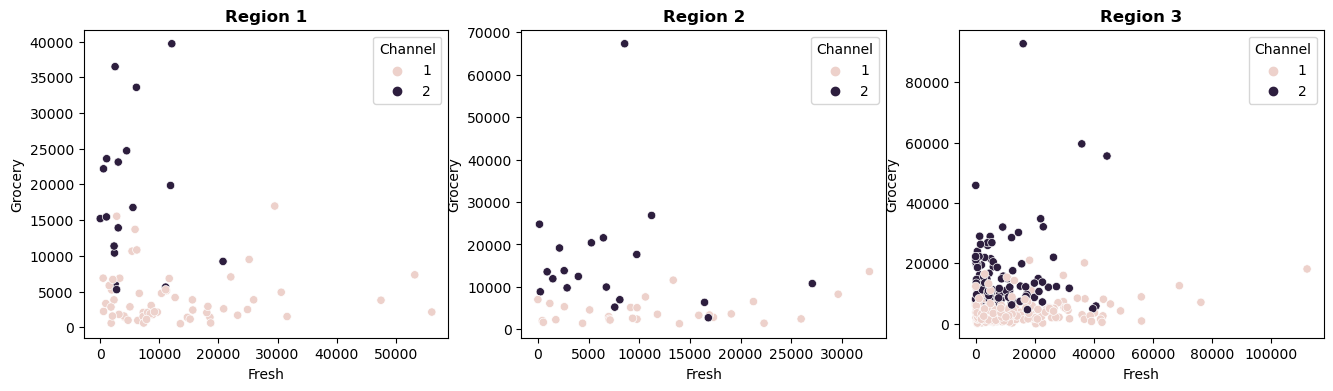

In [45]:
#[Problem 12] Useful information for wholesalers

fig, axes = plt.subplots(1,3, figsize=(16,4))
ax = axes[0]
sns.scatterplot(data=df_train[df_train.Region == 1], ax = ax, x="Fresh", y="Grocery", hue="Channel")
ax.set_title('Region 1', fontweight ="bold")

ax = axes[1]
sns.scatterplot(data=df_train[df_train.Region == 2], ax = ax, x="Fresh", y="Grocery", hue="Channel")
ax.set_title('Region 2', fontweight ="bold")

ax = axes[2]
sns.scatterplot(data=df_train[df_train.Region == 3], ax = ax, x="Fresh", y="Grocery", hue="Channel")
ax.set_title('Region 3', fontweight ="bold")